In [2]:
#importar la librerias
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import datetime as dt
import seaborn as sns

plt.style.use('ggplot')
sns.set_style('darkgrid')


In [5]:
os.listdir('data')

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [6]:
#leactura de csv de pandas
df=pd.DataFrame()

In [7]:
files=os.listdir('data')
for x in files:
    file=pd.read_csv('data/'+x)
    df=pd.concat([file,df])


In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [10]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [11]:
#conteo de valores nulos
df['Order ID'].isnull().value_counts()

Order ID
False    186305
True        545
Name: count, dtype: int64

In [12]:
df=df[df['Order ID'].notnull()]

In [13]:
df.isnull().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
Name: count, dtype: int64

In [14]:
#definir el tipo de cada variable
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [15]:
df=df[df['Product']!='Product']

In [16]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int64')
df['Price Each']=df['Price Each'].astype('float')
df['Order Date']=pd.to_datetime(df['Order Date'])

C:\Users\eduar\AppData\Local\Temp\ipykernel_21196\1590969258.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date']=pd.to_datetime(df['Order Date'])


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 18382
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Mes               185950 non-null  int32         
 7   Total_Ventas      185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 12.1+ MB


# CUAL FUE EL MES CON LA VENTA MAS ALTA

In [18]:
#extraer el mes
df['Mes']=df['Order Date'].dt.month\

#realizar la multiplicacion de precio por cantidad
df['Total_Ventas']=df['Quantity Ordered']*df['Price Each']

In [38]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


In [30]:
#agrupaciones primero por mes
#df_mes=df.groupby('Mes').sum()

df_mes = df.groupby('Mes')[['Quantity Ordered', 'Price Each', 'Total_Ventas']].sum().reset_index()
df_fecha = df.groupby('Order Date')[['Quantity Ordered', 'Price Each', 'Total_Ventas']].sum().reset_index()

#resetear el indice
df_mes=df_mes.reset_index()


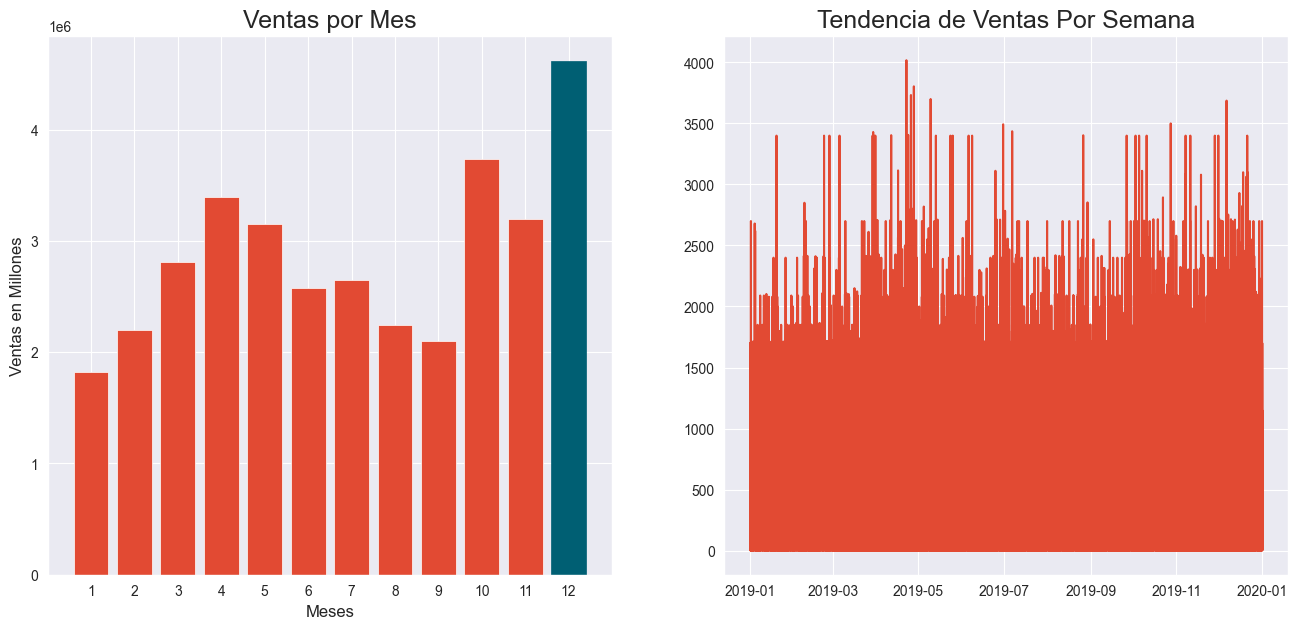

In [33]:
#subplot de graficos
fig, axes=plt.subplots(1,2, figsize=(16,7))
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)
bars=ax1.bar(df_mes['Mes'], df_mes['Total_Ventas'])
ax2.plot(df_fecha['Total_Ventas'])
ax1.set_xticks(df_mes['Mes'])
ax1.set_title('Ventas por Mes', size=18)
ax2.set_title('Tendencia de Ventas Por Semana', size=18)

ax1.set_xlabel('Meses')
ax1.set_ylabel('Ventas en Millones')
bars[11].set_color('#005f73')

plt.show()


In [308]:
#df_mes

In [32]:
#agrupacion la voy haver por fecha
df_fecha=df.groupby('Order Date').sum()

In [34]:
df_fecha=df_fecha.resample('W').sum()
#df_fecha

In [35]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95


# CUAL ES LA CIUDAD CON MAYOR VENTA

In [36]:
df['Ciudad']=df['Purchase Address'].apply(lambda x: x.split(',')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


In [40]:
#grafica para ver la ciudad
df_ciudad=df.groupby('Ciudad')[['Quantity Ordered', 'Price Each', 'Total_Ventas']].sum()

df_ciudad=df_ciudad.reset_index()


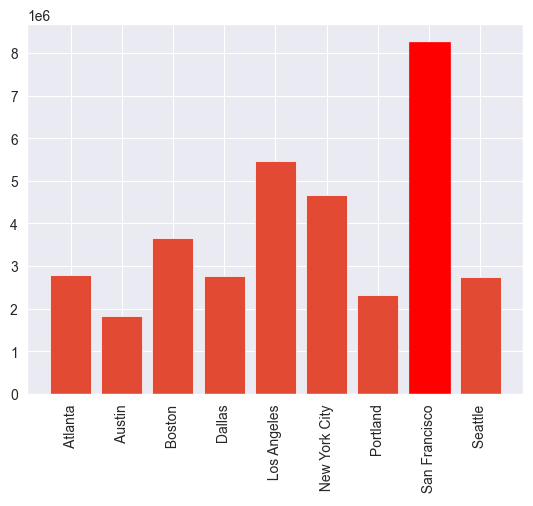

In [41]:
bars=plt.bar(df_ciudad['Ciudad'], df_ciudad['Total_Ventas'])
plt.xticks(rotation=90)
bars[7].set_color('r')
plt.show()

# CUAL ES LA HORA A QUE MAS SE VENDEN PRODUCTOS

In [42]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


In [43]:
df['Hora']=df['Order Date'].apply(lambda x: x.hour)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad,Hora
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19


In [45]:
#agrupacion por las horas 
df_hour=df.groupby('Hora')[['Quantity Ordered', 'Price Each', 'Total_Ventas']].sum()
df_hour=df_hour.reset_index()

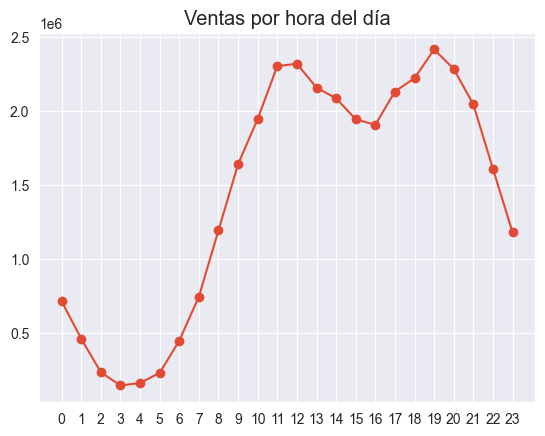

In [46]:
#grafica de lineas
plt.plot(df_hour['Total_Ventas'], marker='o')
plt.xticks(df_hour['Hora'])
plt.title('Ventas por hora del día')

plt.show()

# CUALES SON LOS PRODUCTOS QUE SE VENDEN JUNTOS

In [47]:
df=df[df['Order ID'].duplicated(keep=False)]

df['agrupado']=df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))

df=df[['Order ID', 'agrupado']].drop_duplicates()

C:\Users\eduar\AppData\Local\Temp\ipykernel_21196\1349035062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agrupado']=df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


In [48]:
import itertools
from itertools import combinations #genera el conjutno de combinaciones
import collections
from collections import Counter #simplemente para realizar conteos

In [49]:
count = Counter()

for r in df['agrupado']:
    filas= r.split(',')
    count.update(Counter(combinations(filas, 2)))

In [50]:
count

Counter({('iPhone', 'Lightning Charging Cable'): 1005,
         ('Google Phone', 'USB-C Charging Cable'): 987,
         ('iPhone', 'Wired Headphones'): 447,
         ('Google Phone', 'Wired Headphones'): 414,
         ('Vareebadd Phone', 'USB-C Charging Cable'): 361,
         ('iPhone', 'Apple Airpods Headphones'): 360,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('USB-C Charging Cable', 'Wired Headphones'): 160,
         ('Vareebadd Phone', 'Wired Headphones'): 143,
         ('Lightning Charging Cable', 'Wired Headphones'): 92,
         ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81,
         ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80,
         ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77,
         ('Apple Airpods Headphones', 'Wired Headphones'): 69,
         ('Lightning Charging Cable', 'USB-C Charging Cable'): 58,
         ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55,
         ('Lightning Charging Cable'

In [51]:
comunes=count.most_common(10)
comunes

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]